In [81]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sklearn.metrics as mt

In [82]:
data = yf.download("THYAO.IS",start="2022-08-01",end="2022-09-01")
veri = data.copy()
veri = veri.reset_index() # date sütunu gözükmediği için böyle bir çözüm yapıyoruz
# Aşağıda veri tipini datetime dan str çevirdik ve "-" olan yerleden parçalayıp 2. indeksi aldık
veri["Day"]=veri["Date"].astype(str).str.split("-").str[2]

[*********************100%%**********************]  1 of 1 completed


In [83]:
y = veri["Adj Close"]
x = veri["Day"]
print(y)

# Arraye çevirmeyi ve bir sütun haline mutlaka getirilmeli
y = np.array(y).reshape(-1,1)
x = np.array(x).reshape(-1,1)
print(y)


0     51.500000
1     52.349998
2     55.000000
3     55.299999
4     58.200001
5     58.750000
6     58.599998
7     60.150002
8     61.400002
9     62.400002
10    63.599998
11    67.849998
12    68.699997
13    69.650002
14    68.500000
15    67.750000
16    67.800003
17    68.650002
18    70.300003
19    69.699997
20    70.449997
21    73.099998
Name: Adj Close, dtype: float64
[[51.5       ]
 [52.34999847]
 [55.        ]
 [55.29999924]
 [58.20000076]
 [58.75      ]
 [58.59999847]
 [60.15000153]
 [61.40000153]
 [62.40000153]
 [63.59999847]
 [67.84999847]
 [68.69999695]
 [69.65000153]
 [68.5       ]
 [67.75      ]
 [67.80000305]
 [68.65000153]
 [70.30000305]
 [69.69999695]
 [70.44999695]
 [73.09999847]]


In [84]:
# StandartScallerları ayrı ayrı yapıyoruz
scx = StandardScaler()
scy = StandardScaler()

X = scx.fit_transform(x)
Y = scy.fit_transform(y)

In [85]:
svrModel = SVR()
svrModel.fit(X,Y)
tahmin = svrModel.predict(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
svrModelrbf = SVR(kernel="rbf")
svrModelrbf.fit(X,Y)
tahminrbf = svrModelrbf.predict(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
svrModellin = SVR(kernel="linear")
svrModellin.fit(X,Y)
tahminLin = svrModellin.predict(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
svrModelpoly = SVR(kernel="poly")
svrModelpoly.fit(X,Y)
tahminpoly = svrModelpoly.predict(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


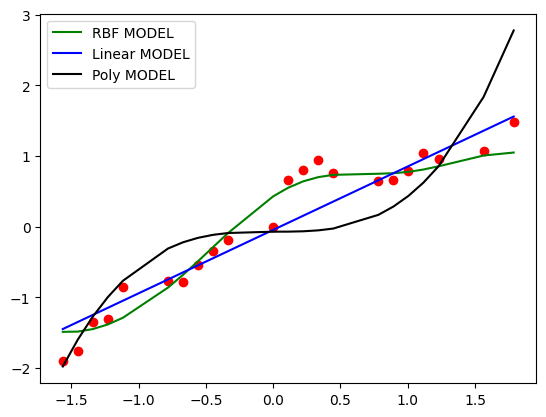

In [89]:
plt.scatter(X,Y,color = "red")
plt.plot(X,tahminrbf,c="green",label="RBF MODEL")
plt.plot(X,tahminLin,c="blue",label="Linear MODEL")
plt.plot(X,tahminpoly,c="black",label="Poly MODEL")
plt.legend()
plt.show()

In [90]:
# rbf Yapısı modelde en iyisi gibi, en başarısızı ise poly olmalı

R2: 0.9517480113828439  RMSE: 0.21966335292250302


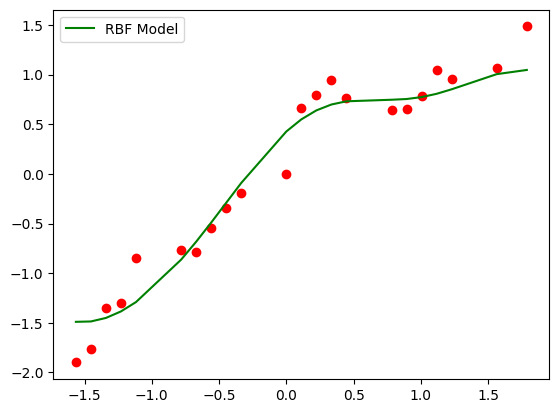

In [92]:
r2 = mt.r2_score(Y,tahminrbf)
rmse = mt.mean_squared_error(Y,tahminrbf,squared=False)
print("R2: {}  RMSE: {}".format(r2,rmse))

plt.scatter(X,Y,color = "red")
plt.plot(X,tahminrbf,c="green",label = "RBF Model")
plt.legend()
plt.show()